# Predictive Modeling for Critical Dimension (CD) Quality Assurance

- **Background**: Precision in semiconductor manufacturing is crucial for product reliability. Wafer etching requires strict dimensional tolerances.
- **Critical Dimensions (CDs)**: CDs represent the physical dimensions of etched features. Deviations can lead to defective products.  
`Example of semiconductor features that need precise measurements`  
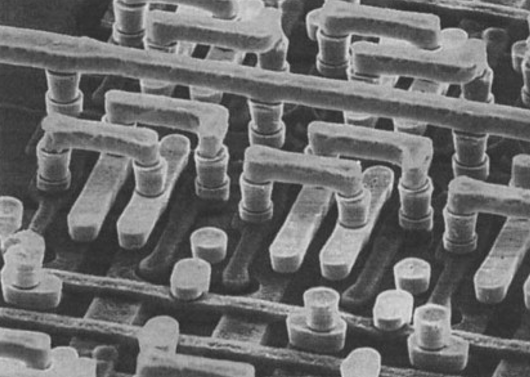
- **Measurement Challenges**: Measuring CDs on all wafers is impractical due to time constraints, creating the need for a predictive solution.

- **Challenge**: Limited CD measurements may miss defects, resulting in waste and downstream issues.
- **Proposed Solution**: Develop a predictive model using etching machine sensor data to estimate CDs and identify out-of-spec wafers for preventive action.

### Use Case
- **Objective**: Create a model that can correlate sensor data with CDs for real-time monitoring and proactive intervention.
- **Preventive Action**: Alerts will notify engineers if predicted CDs are out of spec, allowing adjustments to reduce defects.

### Data Availability
- **Synthetic Sensor Data**: Generated to simulate sensor readings.
- **Historical CD Data**: Used as the target variable with upper, lower, and target specifications.

### Methodology
- **Neural Network**: Selected for its ability to model complex relationships in high-dimensional data.
- **Evaluation Metrics**: Use MAE and RMSE for accuracy, with a focus on recall for identifying out-of-spec wafers.

### Expected Outcomes
- **Prediction Accuracy**: Reduce reliance on physical measurements.
- **Defective Reduction**: Minimize waste by predicting out-of-spec wafers.
- **Real-time Monitoring**: Enable rapid interventions and continuous process improvement.


In [ ]:
import pandas as pd
from helper_functions import (
    sensor_limits,
    cd_targets,
    generate_synthetic_data,
    add_noise_to_samples,
    generate_out_of_spec_samples,
    add_cd_values,
    add_cd_spec_labels
)

## Generating synthetic data
- To generate synthetic training data that is realistic some helper functions have been created in the `helper_functions.py` file.  

- `sensor_limits` is a dictionary that contains arbitrary chamber step/sensor names as keys with a list of numerical values that indicate the upper spec limit, lower spec limit and target values for the respective sensor at that particular step.  
- `cd_targets` is a dictionary that contains the upper limit, lower limit and target for each of the four critical dimensions that will be the target features for the model. This will be used in generating data as well.
- `generate_synthetic_data` is a function that will generate a given number of samples using the `sensor_limits` dictionary.
    - One sample consists of a value for each item in the dictionary
    - If upper and lower spec limits are not the same (which indicates a reading should be zero or constant) sensor readings will be assigned random values within the spec limits in a normal distribution.
    - the `RF` value is not a sensor, but a sum of Radio Frequency hours since the last maintenance. This is an indicator of the chambers performace with very low or very high values likey perfoming poorly. To indicate this, the function will pick a random sensor and adjust the reading to be outside of spec limits. This is intended to introduce samples that are out of spec, which are the key values we want to identify with the model
- `add_noise_to_samples` is a function that will take the synthetic data generated by `generate_synthetic_data` as an argument and add noise to a given number of samples. This is a helper function to add noise to training data and prevent over fitting.  
- `generate_out_of_spec_samples` is a function that will add additional out of spec samples if the synthetic data generated does not have enough
- `add_cd_values` is a function that will assign values for the four critical dimensions that are our target features. function will assign values based on the sensor data. If readings are very high or very low, CD values will be assigned farther from their target.
- `add_cd_spec_labels` function that will add a column to the data that indicates if a sample is out of spec or not

In [11]:
# generate synthetic data
num_wafers = 1000
synthetic_data = generate_synthetic_data(sensor_limits, num_wafers)

# add out-of-spec samples
num_out_of_spec_samples = 100
combined_data = generate_out_of_spec_samples(synthetic_data, sensor_limits, num_out_of_spec_samples)

# add CD values
combined_data_with_cd = add_cd_values(combined_data, sensor_limits, cd_targets)

# add CD InSpec labels
combined_data_with_cd = add_cd_spec_labels(combined_data_with_cd, cd_targets)

print(combined_data_with_cd.head())


NameError: name 'generate_out_of_spec_samples' is not defined